In [2]:
!pip install pandas -q
!pip install scipy -q


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd 
import datetime as dt
import math 
import numpy as np

In [2]:
odf = pd.read_csv("Bond_Data.csv")

In [ ]:
#df["Issue_Date"].astype(str).apply(lambda row: dt.datetime.strptime(row, "%m/%d/%y"))
#df["Maturity_Date"].astype(str).apply(lambda row: dt.datetime.strptime(row, "%m/%d/%y"))

In [5]:
#df.sort_values(by=["Coupon"])
df = odf[odf.columns[:-1]].copy()
df.Coupon = df.Coupon.astype(str).apply(lambda row: float(row[:-1]))
df["Maturity_Date"] = pd.to_datetime(df['Maturity_Date'])
df["Issue_Date"] = pd.to_datetime(df['Issue_Date'])
df.sort_values(by=["Maturity_Date"])



,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
9,CAN 0.25 FEB 23,0.25,2023-02-01,CA135087L773,2020-10-26,99.84,99.86,99.87,99.90,99.91,99.92,99.93,99.94,99.98,99.99
3,CAN 1.75 Mar 23,1.75,2023-03-01,CA135087H490,2017-10-06,99.71,99.70,99.72,99.72,99.74,99.75,99.76,99.77,99.78,99.79
4,CAN 2.25 Mar 23,2.25,2023-03-01,CA135087J546,2018-10-05,97.93,97.87,97.95,97.92,97.87,97.86,97.87,97.92,97.92,97.84
10,CAN 0.25 May 23,0.25,2023-05-01,CA135087L856,2021-02-05,98.83,98.75,98.86,98.88,98.89,98.91,98.92,98.94,98.96,98.97
0,CAN 1.5 Jun 23,1.50,2023-06-01,CA135087A610,2012-07-30,98.92,98.92,98.94,98.95,98.95,98.96,98.98,99.00,99.00,99.00
21,CAN 8 Jun 23,8.00,2023-06-01,CA135087UT96,1992-08-17,101.28,101.25,101.27,101.21,101.20,101.19,101.19,101.20,101.14,101.10
11,CAN 0.25 Aug 23,0.25,2023-08-01,CA135087M359,2021-05-14,97.80,97.80,97.83,97.84,97.83,97.85,97.87,97.90,97.91,97.90
13,CAN 0.5 Nov 23,0.50,2023-11-01,CA135087M763,2021-08-09,97.02,97.01,97.05,97.05,97.01,97.03,97.06,97.11,97.10,97.07
14,CAN 0.75 Feb 24,0.75,2024-02-01,CA135087M920,2021-10-22,96.46,96.44,96.47,96.46,96.38,96.40,96.41,96.47,96.46,96.49
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,95.49,95.44,95.55,95.54,95.49,95.52,95.52,95.59,95.60,95.51


In [6]:
display(df)

,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
0,CAN 1.5 Jun 23,1.50,2023-06-01,CA135087A610,2012-07-30,98.92,98.92,98.94,98.95,98.95,98.96,98.98,99.00,99.00,99.00
1,CAN 2.5 Jun 24,2.50,2024-06-01,CA135087B451,2013-07-02,98.08,98.07,98.17,98.11,98.05,98.02,98.01,98.07,98.07,97.96
2,CAN 2.25 Jun 25,2.25,2025-06-01,CA135087D507,2014-06-30,97.45,97.45,97.70,97.68,97.51,97.43,97.39,97.54,97.56,97.35
3,CAN 1.75 Mar 23,1.75,2023-03-01,CA135087H490,2017-10-06,99.71,99.70,99.72,99.72,99.74,99.75,99.76,99.77,99.78,99.79
4,CAN 2.25 Mar 23,2.25,2023-03-01,CA135087J546,2018-10-05,97.93,97.87,97.95,97.92,97.87,97.86,97.87,97.92,97.92,97.84
5,CAN 1.5 Sep 24,1.50,2024-09-01,CA135087J967,2019-04-05,96.48,96.45,96.58,96.50,96.40,96.40,96.32,96.47,96.48,96.29
6,CAN 1.25 Mar 25,1.25,2025-03-01,CA135087K528,2019-10-11,95.38,95.42,95.61,95.59,95.44,95.38,95.34,95.47,95.50,95.30
7,CAN 0.5 Sep 25,0.50,2025-09-01,CA135087K940,2020-04-03,92.74,92.75,93.03,93.03,92.87,92.82,92.81,92.97,93.00,92.72
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,95.49,95.44,95.55,95.54,95.49,95.52,95.52,95.59,95.60,95.51
9,CAN 0.25 FEB 23,0.25,2023-02-01,CA135087L773,2020-10-26,99.84,99.86,99.87,99.90,99.91,99.92,99.93,99.94,99.98,99.99


In [6]:
indexes = [11,8,5,6,7,28,29,31,35,37]
selected_bonds = df.iloc[indexes]

In [7]:
display(selected_bonds)

,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
11,CAN 0.25 Aug 23,0.25,2023-08-01,CA135087M359,2021-05-14,97.80,97.80,97.83,97.84,97.83,97.85,97.87,97.90,97.91,97.90
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,95.49,95.44,95.55,95.54,95.49,95.52,95.52,95.59,95.60,95.51
5,CAN 1.5 Sep 24,1.50,2024-09-01,CA135087J967,2019-04-05,96.48,96.45,96.58,96.50,96.40,96.40,96.32,96.47,96.48,96.29
6,CAN 1.25 Mar 25,1.25,2025-03-01,CA135087K528,2019-10-11,95.38,95.42,95.61,95.59,95.44,95.38,95.34,95.47,95.50,95.30
7,CAN 0.5 Sep 25,0.50,2025-09-01,CA135087K940,2020-04-03,92.74,92.75,93.03,93.03,92.87,92.82,92.81,92.97,93.00,92.72
28,CAN 0.25 Mar 26,0.25,2026-03-01,CA135087L518,2020-10-09,91.08,91.19,91.43,91.51,91.32,91.23,91.21,91.41,91.45,91.17
29,CAN 1 Sep 26,1.00,2026-09-01,CA135087L930,2021-04-16,92.72,92.84,93.24,93.29,92.95,92.90,92.91,93.05,93.04,92.77
31,CAN 1.25 Mar 27,1.25,2027-03-01,CA135087M847,2021-10-15,93.14,93.25,93.73,93.78,93.39,93.33,93.35,93.50,93.46,93.14
35,CAN 2.75 Sep 27,2.75,2027-09-01,CA135087N837,2022-05-13,99.10,99.22,99.71,99.71,99.24,99.14,99.15,99.29,99.24,99.86
37,CAN 3.5 Mar 28,3.50,2028-03-01,CA135087P576,2022-10-21,102.73,102.84,103.40,103.38,102.83,102.73,102.77,102.92,102.82,102.40


In [8]:
from scipy import optimize 
class CouponBond():
    def get_price(self, coupon, face_value, int_rate, years, freq=2):
        total_coupons_pv = self.get_coupons_pv(coupon, int_rate, years, freq)
        face_value_pv = self.get_face_value_pv(face_value, int_rate, years)
        result = total_coupons_pv + face_value_pv 
        return result 
        
    @staticmethod 
    def get_face_value_pv(face_value, interest_rate, years):
        fvpv = face_value / (1 + interest_rate)**years
        return fvpv
    
    def get_coupons_pv(self, coupon, int_rate, years, freq=2):
        pv = 0 
        for period in range(int(years*freq)):
            pv += self.get_coupon_pv(coupon, int_rate, period +1, freq=2)
        return pv 
    
    @staticmethod
    def get_coupon_pv(coupon, int_rate, period, freq=2):
        pv = (coupon/freq)/(1+int_rate/freq)**period
        return pv 
    
    def get_ytm(self, bond_price, face_value, coupon, years, freq=2, estimate=0.05):
        get_yield = lambda int_rate: self.get_price(coupon, face_value, int_rate, years, freq)-bond_price
        return optimize.newton(get_yield, estimate)
    
        

In [9]:
yield_df = selected_bonds.copy()

In [10]:
price_df = selected_bonds.copy()

In [11]:
face_value = 100
for i in range(yield_df.shape[0]):
    coup_calc = CouponBond()
    for column in yield_df.columns[-10:]:
        yield_df[column].iloc[i] = 100*coup_calc.get_ytm(selected_bonds[column].iloc[i], face_value, selected_bonds.Coupon.iloc[i], (i+1)/2, 2)
        


/var/folders/zl/s3q5r1wx13j0w14y9mmvz4_80000gn/T/ipykernel_53342/3870700366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_df[column].iloc[i] = 100*coup_calc.get_ytm(selected_bonds[column].iloc[i], face_value, selected_bonds.Coupon.iloc[i], (i+1)/2, 2)


In [12]:
display(yield_df)
    

,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
11,CAN 0.25 Aug 23,0.25,2023-08-01,CA135087M359,2021-05-14,4.811045,4.811045,4.746775,4.725365,4.746775,4.703961,4.661174,4.597042,4.575677,4.597042
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,4.987923,5.042958,4.921957,4.932946,4.987923,4.954930,4.954930,4.878026,4.867049,4.965925
5,CAN 1.5 Sep 24,1.50,2024-09-01,CA135087J967,2019-04-05,3.977931,3.999649,3.905619,3.963459,4.035871,4.035871,4.093892,3.985169,3.977931,4.115670
6,CAN 1.25 Mar 25,1.25,2025-03-01,CA135087K528,2019-10-11,3.699920,3.677979,3.573950,3.584886,3.667014,3.699920,3.721875,3.650573,3.634140,3.743843
7,CAN 0.5 Sep 25,0.50,2025-09-01,CA135087K940,2020-04-03,3.592394,3.587904,3.462445,3.462445,3.534071,3.556489,3.560975,3.489284,3.475861,3.601377
28,CAN 0.25 Mar 26,0.25,2026-03-01,CA135087L518,2020-10-09,3.431703,3.389963,3.299126,3.268918,3.340720,3.374801,3.382381,3.306684,3.291571,3.397547
29,CAN 1 Sep 26,1.00,2026-09-01,CA135087L930,2021-04-16,3.241240,3.202507,3.073867,3.057837,3.167060,3.183165,3.179943,3.134882,3.138097,3.225093
31,CAN 1.25 Mar 27,1.25,2027-03-01,CA135087M847,2021-10-15,3.109344,3.078238,2.943048,2.929016,3.038717,3.055645,3.050001,3.007717,3.018984,3.109344
35,CAN 2.75 Sep 27,2.75,2027-09-01,CA135087N837,2022-05-13,2.985609,2.956402,2.837598,2.837598,2.951538,2.975868,2.973434,2.939384,2.951538,2.801377
37,CAN 3.5 Mar 28,3.50,2028-03-01,CA135087P576,2022-10-21,2.928572,2.904848,2.784563,2.788845,2.907004,2.928572,2.919942,2.887615,2.909160,2.999935


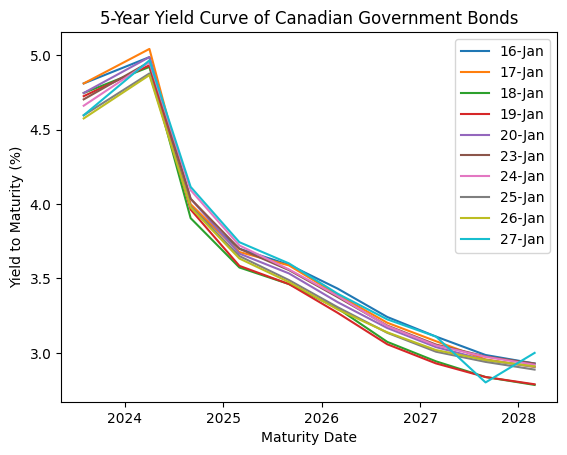

In [13]:
import matplotlib.pyplot as plt

for date in yield_df.columns[-10:]:  
    plt.plot(yield_df.Maturity_Date, yield_df[date], label = date)
plt.xlabel("Maturity Date")
plt.ylabel("Yield to Maturity (%)")
plt.title("5-Year Yield Curve of Canadian Government Bonds")
plt.legend()
plt.show()
    
   

In [14]:
def gen_spot_rate(face, price, coupon, spot_rates, freq):
    value = price
    for i in range(len(spot_rates)):
        value -= (coupon/freq)/((1+(spot_rates[i]/freq))**(i+1))
    last_period = len(spot_rates)
    
    new_rate = -math.log(value/(face+(coupon/freq)))/last_period
    return new_rate
    
 

In [15]:
yield_df

,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
11,CAN 0.25 Aug 23,0.25,2023-08-01,CA135087M359,2021-05-14,4.811045,4.811045,4.746775,4.725365,4.746775,4.703961,4.661174,4.597042,4.575677,4.597042
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,4.987923,5.042958,4.921957,4.932946,4.987923,4.954930,4.954930,4.878026,4.867049,4.965925
5,CAN 1.5 Sep 24,1.50,2024-09-01,CA135087J967,2019-04-05,3.977931,3.999649,3.905619,3.963459,4.035871,4.035871,4.093892,3.985169,3.977931,4.115670
6,CAN 1.25 Mar 25,1.25,2025-03-01,CA135087K528,2019-10-11,3.699920,3.677979,3.573950,3.584886,3.667014,3.699920,3.721875,3.650573,3.634140,3.743843
7,CAN 0.5 Sep 25,0.50,2025-09-01,CA135087K940,2020-04-03,3.592394,3.587904,3.462445,3.462445,3.534071,3.556489,3.560975,3.489284,3.475861,3.601377
28,CAN 0.25 Mar 26,0.25,2026-03-01,CA135087L518,2020-10-09,3.431703,3.389963,3.299126,3.268918,3.340720,3.374801,3.382381,3.306684,3.291571,3.397547
29,CAN 1 Sep 26,1.00,2026-09-01,CA135087L930,2021-04-16,3.241240,3.202507,3.073867,3.057837,3.167060,3.183165,3.179943,3.134882,3.138097,3.225093
31,CAN 1.25 Mar 27,1.25,2027-03-01,CA135087M847,2021-10-15,3.109344,3.078238,2.943048,2.929016,3.038717,3.055645,3.050001,3.007717,3.018984,3.109344
35,CAN 2.75 Sep 27,2.75,2027-09-01,CA135087N837,2022-05-13,2.985609,2.956402,2.837598,2.837598,2.951538,2.975868,2.973434,2.939384,2.951538,2.801377
37,CAN 3.5 Mar 28,3.50,2028-03-01,CA135087P576,2022-10-21,2.928572,2.904848,2.784563,2.788845,2.907004,2.928572,2.919942,2.887615,2.909160,2.999935


In [17]:
face_value = 100 
freq = 2
spot_df = yield_df.copy()
for column in spot_df.columns[-10:] :
    spot_rates = [(yield_df[column].iloc[0])/100]
    for i in range(1,spot_df.shape[0]):
        spot_rate = gen_spot_rate(face_value, price_df[column].iloc[i], price_df["Coupon"].iloc[i], spot_rates, freq)
        spot_rates += [spot_rate]
        spot_df[column].iloc[i] = 100*spot_rate


/var/folders/zl/s3q5r1wx13j0w14y9mmvz4_80000gn/T/ipykernel_53342/3193397678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df[column].iloc[i] = 100*spot_rate


In [18]:
display(spot_df)

,Name,Coupon,Maturity_Date,ISIN,Issue_Date,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan
11,CAN 0.25 Aug 23,0.25,2023-08-01,CA135087M359,2021-05-14,4.811045,4.811045,4.746775,4.725365,4.746775,4.703961,4.661174,4.597042,4.575677,4.597042
8,CAN 0.25 Apr 24,0.25,2024-04-01,CA135087L690,2020-10-16,4.867698,4.920140,4.804844,4.815337,4.867738,4.836313,4.836340,4.763030,4.752569,4.846863
5,CAN 1.5 Sep 24,1.50,2024-09-01,CA135087J967,2019-04-05,2.920987,2.936581,2.868753,2.910819,2.963216,2.963413,3.005637,2.927036,2.921853,3.021533
6,CAN 1.25 Mar 25,1.25,2025-03-01,CA135087K528,2019-10-11,2.421024,2.406621,2.339557,2.346533,2.399593,2.421069,2.435234,2.389405,2.378791,2.449488
7,CAN 0.5 Sep 25,0.50,2025-09-01,CA135087K940,2020-04-03,2.206816,2.204063,2.128163,2.128114,2.171438,2.185048,2.187725,2.144415,2.136297,2.212214
28,CAN 0.25 Mar 26,0.25,2026-03-01,CA135087L518,2020-10-09,2.025441,2.001132,1.948365,1.930738,1.972488,1.992333,1.996727,1.952740,1.943951,2.005534
29,CAN 1 Sep 26,1.00,2026-09-01,CA135087L930,2021-04-16,1.865817,1.843602,1.770305,1.761066,1.823435,1.832615,1.830686,1.805275,1.807207,1.856517
31,CAN 1.25 Mar 27,1.25,2027-03-01,CA135087M847,2021-10-15,1.757891,1.740344,1.664498,1.656532,1.718188,1.727690,1.724407,1.701003,1.707486,1.757890
35,CAN 2.75 Sep 27,2.75,2027-09-01,CA135087N837,2022-05-13,1.676126,1.659543,1.593057,1.593128,1.657422,1.671230,1.669693,1.651315,1.658470,1.569422
37,CAN 3.5 Mar 28,3.50,2028-03-01,CA135087P576,2022-10-21,1.636999,1.623612,1.556320,1.558913,1.625690,1.637893,1.632700,1.615438,1.628142,1.679816


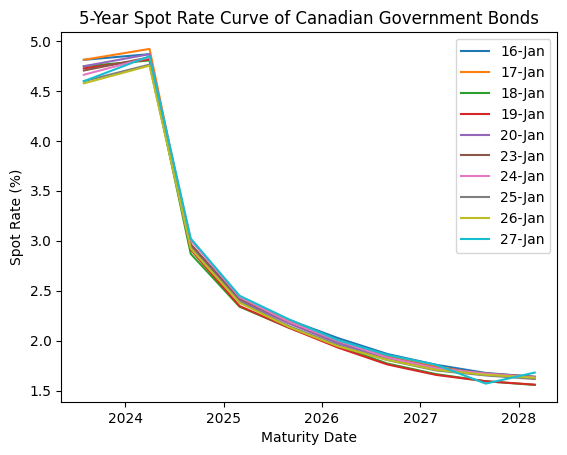

In [19]:
for date in yield_df.columns[-10:]:  
    plt.plot(spot_df.Maturity_Date, spot_df[date], label = date)
plt.xlabel("Maturity Date")
plt.ylabel("Spot Rate (%)")
plt.title("5-Year Spot Rate Curve of Canadian Government Bonds")
plt.legend()
plt.show()

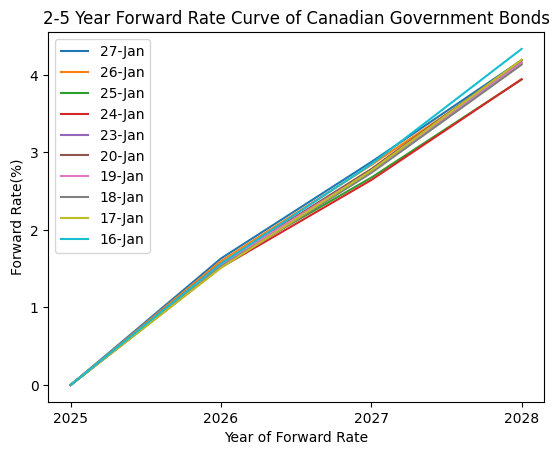

In [21]:
#spot_df.reset_index(inplace=True)
forward_spots = spot_df.iloc[range(3,10,2)]

spots = forward_spots[forward_spots.columns[-10:]].to_numpy()/100
forwards = np.zeros(spots.shape)

spots

for i in range(4):
    temp = spots + 1
    forwards[i,:] = (np.power(temp[i,:], i+1)/(np.power(temp[0,:],1))) -1
forwards = forwards*100
axis = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr']
years = ['2025', '2026', '2027', '2028']
for i in range(10):
    plt.plot(years, forwards[:,i],label = yield_df.columns[-i-1])

plt.xlabel("Year of Forward Rate")
plt.ylabel("Forward Rate(%)")
plt.title("2-5 Year Forward Rate Curve of Canadian Government Bonds")
plt.legend()
plt.show()    

In [23]:
yields = yield_df[yield_df.columns[-10:]].to_numpy()/100

log_yield_returns = np.zeros((9,10))

for i in range(9):
    log_yield_returns[i, :] = np.log(yields[:, i+1]) - np.log(yields[:, i])

covy = np.cov(log_yield_returns.T)
display(pd.DataFrame(np.cov(log_yield_returns.T), columns = yield_df.Name))

Name,CAN 0.25 Aug 23,CAN 0.25 Apr 24,CAN 1.5 Sep 24,CAN 1.25 Mar 25,CAN 0.5 Sep 25,CAN 0.25 Mar 26,CAN 1 Sep 26,CAN 1.25 Mar 27,CAN 2.75 Sep 27,CAN 3.5 Mar 28
0,0.000049,0.000091,0.000115,0.000103,0.000123,0.000103,0.000124,0.000134,0.000030,0.000137
1,0.000091,0.000192,0.000250,0.000218,0.000260,0.000209,0.000247,0.000268,0.000045,0.000267
2,0.000115,0.000250,0.000388,0.000336,0.000373,0.000325,0.000348,0.000369,0.000049,0.000367
3,0.000103,0.000218,0.000336,0.000345,0.000377,0.000354,0.000395,0.000417,0.000116,0.000415
4,0.000123,0.000260,0.000373,0.000377,0.000427,0.000387,0.000435,0.000464,0.000089,0.000461
5,0.000103,0.000209,0.000325,0.000354,0.000387,0.000385,0.000412,0.000434,0.000086,0.000428
6,0.000124,0.000247,0.000348,0.000395,0.000435,0.000412,0.000508,0.000540,0.000241,0.000543
7,0.000134,0.000268,0.000369,0.000417,0.000464,0.000434,0.000540,0.000576,0.000259,0.000579
8,0.000030,0.000045,0.000049,0.000116,0.000089,0.000086,0.000241,0.000259,0.000728,0.000280
9,0.000137,0.000267,0.000367,0.000415,0.000461,0.000428,0.000543,0.000579,0.000280,0.000588


In [25]:
f2 = forwards.T
log_forward_returns = np.zeros(f2.shape)
f2 = np.abs(f2)


for i in range(3):
    if i != 0:
        log_forward_returns[:, i] = np.log(f2[:, i+1]) - np.log(f2[:, 1])
    else:
        log_forward_returns[:, i] = np.log(f2[:, i+1])



covf = np.cov(log_forward_returns)
        
covf

array([[0.15023353, 0.15217419, 0.14751638, 0.15213096, 0.15777966,
        0.15680201, 0.15593172, 0.15962159, 0.16289885, 0.16246865],
       [0.15217419, 0.15432679, 0.14963621, 0.15459409, 0.16032221,
        0.15921955, 0.1583375 , 0.16235157, 0.16578166, 0.1650974 ],
       [0.14751638, 0.14963621, 0.14516904, 0.15003504, 0.15555356,
        0.15448792, 0.15364177, 0.15756434, 0.16089535, 0.16020146],
       [0.15213096, 0.15459409, 0.15003504, 0.15547465, 0.16117195,
        0.15990866, 0.15903612, 0.16348957, 0.16708724, 0.16600462],
       [0.15777966, 0.16032221, 0.15555356, 0.16117195, 0.16709857,
        0.16578369, 0.16487417, 0.16948424, 0.1732154 , 0.17210167],
       [0.15680201, 0.15921955, 0.15448792, 0.15990866, 0.16578369,
        0.16454992, 0.16364916, 0.16806347, 0.17170263, 0.17074529],
       [0.15593172, 0.1583375 , 0.15364177, 0.15903612, 0.16487417,
        0.16364916, 0.16275452, 0.16714455, 0.17076278, 0.16981025],
       [0.15962159, 0.16235157, 0.1575643

In [26]:
eig_yield = np.linalg.eigh(covy)
eig_for = np.linalg.eigh(covf)

In [28]:
print(eig_yield)
print(eig_for)

(array([-2.46104808e-19, -2.28281530e-20,  8.86814131e-07,  3.14641601e-06,
        8.20859719e-06,  1.16666907e-05,  5.63655507e-05,  1.28379159e-04,
        7.17471250e-04,  3.25777970e-03]), array([[ 0.36007907, -0.20505165, -0.18539657,  0.37489298, -0.65899847,
         0.28853692, -0.32135939,  0.14109654,  0.0468462 , -0.10233799],
       [-0.45344784,  0.08492611, -0.13086407, -0.30723257,  0.14429241,
         0.40680965, -0.51020328,  0.41182276,  0.12660209, -0.20834467],
       [ 0.12108624,  0.04646805,  0.21524313, -0.14943842, -0.20289908,
        -0.49752197,  0.1982283 ,  0.67094777,  0.21728457, -0.29856874],
       [-0.27563549, -0.36872044, -0.60674542,  0.34908635,  0.20508789,
        -0.05598321,  0.36639942,  0.08512562,  0.10407591, -0.31709173],
       [ 0.48240645,  0.19370453,  0.24038229,  0.32856347,  0.54396813,
         0.32858981,  0.01614195,  0.08757071,  0.17074169, -0.35081399],
       [-0.23436698,  0.11549785,  0.26347252, -0.17107772, -0.37425396